In [1]:
# equity_premium.ipynb

# Calculations for pricing kernel chapter

# NYU course ECON-UB 233, Macro foundations for asset pricing.
# Written by: Michael Cai for Dave Backus

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import exp, sqrt, log

In [3]:
#1. Two-state version
#Equity-premium calculations: two-state version

#(a) compute returns for given alpha
print("Inputs :")
# state and consumption growth
mu_logg = 0.0200
sigma_logg = 0.0350
omega = 0.5

print ("mu_logg = %f" %mu_logg) 
print ("sigma_logg = %f" %sigma_logg) 
print ("omega = %f" %omega)

z = np.array([-1,1])
logg = mu_logg + sigma_logg*z

g = np.array([exp(logg[0]),exp(logg[1])])
p = np.array([omega, 1-omega])

Inputs :
mu_logg = 0.020000
sigma_logg = 0.035000
omega = 0.500000


In [9]:
# preferences and asset prices
beta = 1
alpha = 5
lambda_ = 1

print("beta = %d" %beta)
print("alpha = %d" %alpha)
print("lambda = %d \n" %lambda_)

print("Asset prices and returns \n")

m = np.array([beta*g[0]**(-alpha),beta*g[1]**(-alpha)])
d = np.array([g[0]**lambda_,g[1]**lambda_])

print("m = ") 
print(m)
print("d = ")
print(d)

q1 = np.sum(p*m)

r1 = 1/q1 

qe = np.sum(p*m*d)

Ere = np.sum(p*d)/qe

eq_premium = Ere - r1

Var_m = p[0]*m[0]**2 + p[1]*m[1]**2 - q1**2
Std_m = sqrt(Var_m)
temp = Std_m/q1 #change the name of this variable later. Is this a bound?

print("\nq1 = %f" %q1)
print("r1 = %f" %r1)
print("qe = %f" %qe)
print("Ere = %f" %Ere)
print("eq_premium = %f" %eq_premium)
print("Std_m = %f" %Std_m)
print("Std_m/q1 = %f" %temp)

beta = 1
alpha = 5
lambda = 1 

Asset prices and returns 

m = 
[ 1.07788415  0.75957212]
d = 
[ 0.98511194  1.05654061]

q1 = 0.918728
r1 = 1.088461
qe = 0.932178
Ere = 1.095098
eq_premium = 0.006637
Std_m = 0.159156
Std_m/q1 = 0.173235


In [10]:
#(b) compute for grid of alpha's for figs
amin = 0 
amax = 50
astep = .25

alphagrid = np.arange(amin,amax,astep)
q1grid = []
r1grid = []
qegrid = []
Eregrid = []

for item in alphagrid:
    q1grid.append(beta*(p[0]/g[0]**item + p[1]/g[1]**item))
    qegrid.append(beta*(p[0]*d[0]/g[0]**item + p[1]*d[1]/g[1]**item))
    
for item in q1grid:
    r1grid.append(1/item)
    
for item in qegrid:
    Eregrid.append(sum(p*d)/item)

q1grid = np.asarray(q1grid)
r1grid = np.asarray(r1grid)
qegrid = np.asarray(qegrid)
Eregrid = np.asarray(Eregrid)
epgrid = np.asarray(Eregrid) - np.asarray(r1grid)

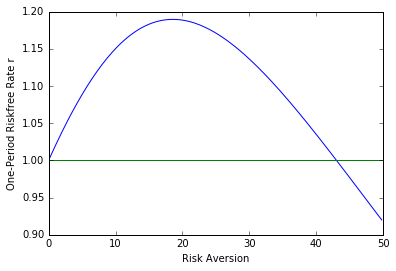

In [11]:
#Figure 1
plt.plot(alphagrid,r1grid)
plt.plot(alphagrid,np.ones(len(r1grid)))
plt.xlabel('Risk Aversion')
plt.ylabel('One-Period Riskfree Rate r')
plt.show()

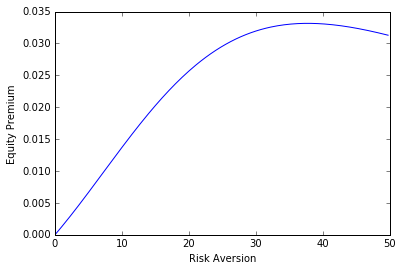

In [12]:
#Figure 2
plt.plot(alphagrid, epgrid, label = 'Figure 2')
plt.xlabel('Risk Aversion')
plt.ylabel('Equity Premium')
plt.show()

In [13]:
#Equity Premium calculations: Lognormal version

mu_g = 0.0200
sigma_g = 0.0350

beta = 0.99
amin = 0
amax = 50
astep = 1
alphagrid = np.arange(amin,amax,astep)
lambda_ = 1;

q1grid = []
r1grid = []
qegrid = []
Eregrid = []

epgrid_alt = []

for item in alphagrid:
    q1grid.append(beta*exp(-item*mu_g + item**2*sigma_g**2/2))
    qegrid.append(beta*exp((1-item)*mu_g + (1-item)**2*sigma_g**2/2))
    epgrid_alt.append((1/beta)*exp(item*mu_g - item**2*sigma_g**2/2)*
            (exp(item*lambda_*sigma_g**2)-1))
    
for item in q1grid:
    r1grid.append(1/item)
    
for item in qegrid:
    Eregrid.append(sum(p*d)/item)

q1grid = np.asarray(q1grid)
r1grid = np.asarray(r1grid)
qegrid = np.asarray(qegrid)
Eregrid = np.asarray(Eregrid)

epgrid = np.asarray(Eregrid) - np.asarray(r1grid)
epgrid_alt = np.asarray(epgrid_alt)

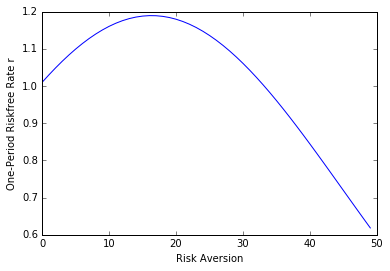

In [14]:
#Figure 3
plt.plot(alphagrid,r1grid)
plt.xlabel('Risk Aversion')
plt.ylabel('One-Period Riskfree Rate r')
plt.show()

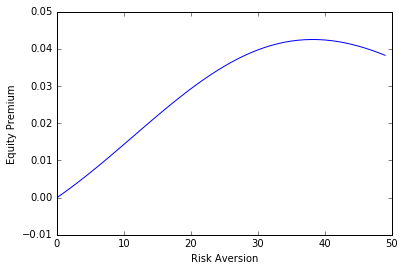

In [15]:
#Figure 4
plt.plot(alphagrid, epgrid, label = 'Figure 2')
plt.xlabel('Risk Aversion')
plt.ylabel('Equity Premium')
plt.show()

In [16]:
#Equity premium practice problem

#state and consumption growth
z = np.array([-1,1])
p = np.array([0.5,0.5])

mu_logg = 0.0200
sigma_logg = 0.0350
logg = mu_logg + np.multiply(sigma_logg,z)
g = np.exp(logg)

#preferences and asset prices
beta = 0.99
alpha = 5
lambda_ = 1

#Asset Prices and Returns
m = []
d = []

for item in g:
    m.append(beta*item**(-alpha))
    d.append(item**lambda_)

np.asarray(m)
np.asarray(d)

#returns in levels
q1 = sum(p*m)
r1 = 1/q1

qe = sum(p*m*d)
re = np.multiply(d,1/qe)
Ere = sum(p*re)

eq_premium = sum(p*(re-r1))
Stdre = sqrt(sum(p*(re-Ere)**2))
Sharpe_eq = eq_premium/Stdre

E_m = q1

#Refactor this code later... definitely not pretty.
temp1 = [] 
temp2 = []
for i,item in enumerate(p):
    temp1.append(item*m[i]**2)
    temp2.append(item*m[i])

Var_m = sum(temp1) - sum(temp2)**2

Std_m = sqrt(Var_m)
Sharpe_max = Std_m/E_m

#return in logs
eq_premium_logs = sum(p[0]*(np.log(re)-np.log(r1)))
#H = log(E_0.0152m) - sum(p.*log(m)) 
#^This is from the Matlab code, although it doesn't compile properly
#in the Matlab code, so I am unsure as to what is the issue. 
#Check back later